# <B>Objective:</B>
This notebook contains code related to data collection, preprocessing and EDA

# Business Objective
In this project, we’ll be using Credit Card Approval Dataset. The structure of our project will be as follows;

To get a basic introduction of our project & What’s the business problem associated with it ?
We’ll start by loading and viewing the dataset.
<li>To manipulate data, if there are any missing entries in the dataset.
<li>To perform exploratory data analysis (EDA) on our dataset.
<li>To pre-process data before applying machine learning model to the dataset.
<li>To apply machine learning models that can predict if an individual’s application for a credit card will be accepted or not.

### Credit Card Applications and the problems associated with it

Banks receive a lot of applications for issuance of credit cards. Many of them rejected for many reasons, like high-loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and a time-consuming process. This task can be automated with the power of machine learning, In this project, we will be build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.
    
### Task

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

# Import needed libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

import missingno as msno #to visualize missing data

from imblearn.over_sampling import SMOTE,ADASYN
import itertools


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,roc_curve
# plot_confusion_matrix,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder #label encoding for categorical columns

pyo.init_notebook_mode()

# 1. Importing Data & EDA

In [5]:
data = pd.read_csv("Data/Raw Data/application_record.csv", encoding = 'utf-8') 
record = pd.read_csv("Data/Raw Data/credit_record.csv", encoding = 'utf-8') 

In [6]:
data.shape

(438557, 18)

In [7]:
record.shape

(1048575, 3)

In [8]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))
data.head()

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

Unique clients and rows are not equal,which means there are duplicates.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
data.describe(include='all')

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  \
count   4.385570e+05      438557       438557          438557  438557.000000   
unique           NaN           2            2               2            NaN   
top              NaN           F            N               Y            NaN   
freq             NaN      294440       275459          304074            NaN   
mean    6.022176e+06         NaN          NaN             NaN       0.427390   
std     5.716370e+05         NaN          NaN             NaN       0.724882   
min     5.008804e+06         NaN          NaN             NaN       0.000000   
25%     5.609375e+06         NaN          NaN             NaN       0.000000   
50%     6.047745e+06         NaN          NaN             NaN       0.000000   
75%     6.456971e+06         NaN          NaN             NaN       1.000000   
max     7.999952e+06         NaN          NaN             NaN      19.000000   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count       4.385570e+05           438557                         438557   
unique               NaN                5                              5   
top                  NaN          Working  Secondary / secondary special   
freq                 NaN           226104                         301821   
mean        1.875243e+05              NaN                            NaN   
std         1.100869e+05              NaN                            NaN   
min         2.610000e+04              NaN                            NaN   
25%         1.215000e+05              NaN                            NaN   
50%         1.607805e+05              NaN                            NaN   
75%         2.250000e+05              NaN                            NaN   
max         6.750000e+06              NaN                            NaN   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE     DAYS_BIRTH  DAYS_EMPLOYED  \
count              438557             438557  438557.000000  438557.000000   
unique                  5                  6            NaN            NaN   
top               Married  House / apartment            NaN            NaN   
freq               299828             393831            NaN            NaN   
mean                  NaN                NaN  -15997.904649   60563.675328   
std                   NaN                NaN    4185.030007  138767.799647   
min                   NaN                NaN  -25201.000000  -17531.000000   
25%                   NaN                NaN  -19483.000000   -3103.000000   
50%                   NaN                NaN  -15630.000000   -1467.000000   
75%                   NaN                NaN  -12514.000000    -371.000000   
max                   NaN                NaN   -7489.000000  365243.000000   

        FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  \
count     438557.0    438557.000000  438557.000000  438557.000000   
unique         NaN              NaN            NaN            NaN   
top            NaN              NaN            NaN            NaN   
freq           NaN              NaN            NaN            NaN   
mean           1.0         0.206133       0.287771       0.108207   
std            0.0         0.404527       0.452724       0.310642   
min            1.0         0.000000       0.000000       0.000000   
25%            1.0         0.000000       0.000000       0.000000   
50%            1.0         0.000000       0.000000       0.000000   
75%            1.0         0.000000       1.000000       0.000000   
max            1.0         1.000000       1.000000       1.000000   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  
count           304354    438557.000000  
unique              18              NaN  
top           Laborers              NaN  
freq             78240              NaN  
mean               NaN         2.194465  
std                NaN         0.897207  
min                NaN         1.000000  
25%                NaN         2.000000  


In [11]:
print("Number of datapoints for credit records: {}".format(len(record)))
print("Number of unique clients in dataset: {}".format(len(record.ID.unique())))
record.head()

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [12]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [13]:
record.describe(include='all')

ID  MONTHS_BALANCE   STATUS
count   1.048575e+06    1.048575e+06  1048575
unique           NaN             NaN        8
top              NaN             NaN        C
freq             NaN             NaN   442031
mean    5.068286e+06   -1.913700e+01      NaN
std     4.615058e+04    1.402350e+01      NaN
min     5.001711e+06   -6.000000e+01      NaN
25%     5.023644e+06   -2.900000e+01      NaN
50%     5.062104e+06   -1.700000e+01      NaN
75%     5.113856e+06   -7.000000e+00      NaN
max     5.150487e+06    0.000000e+00      NaN

In [14]:
len(set(record['ID']).intersection(set(data['ID']))) # checking to see how many records match in two datasets

36457

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 36,457 customers.

### Missing Value

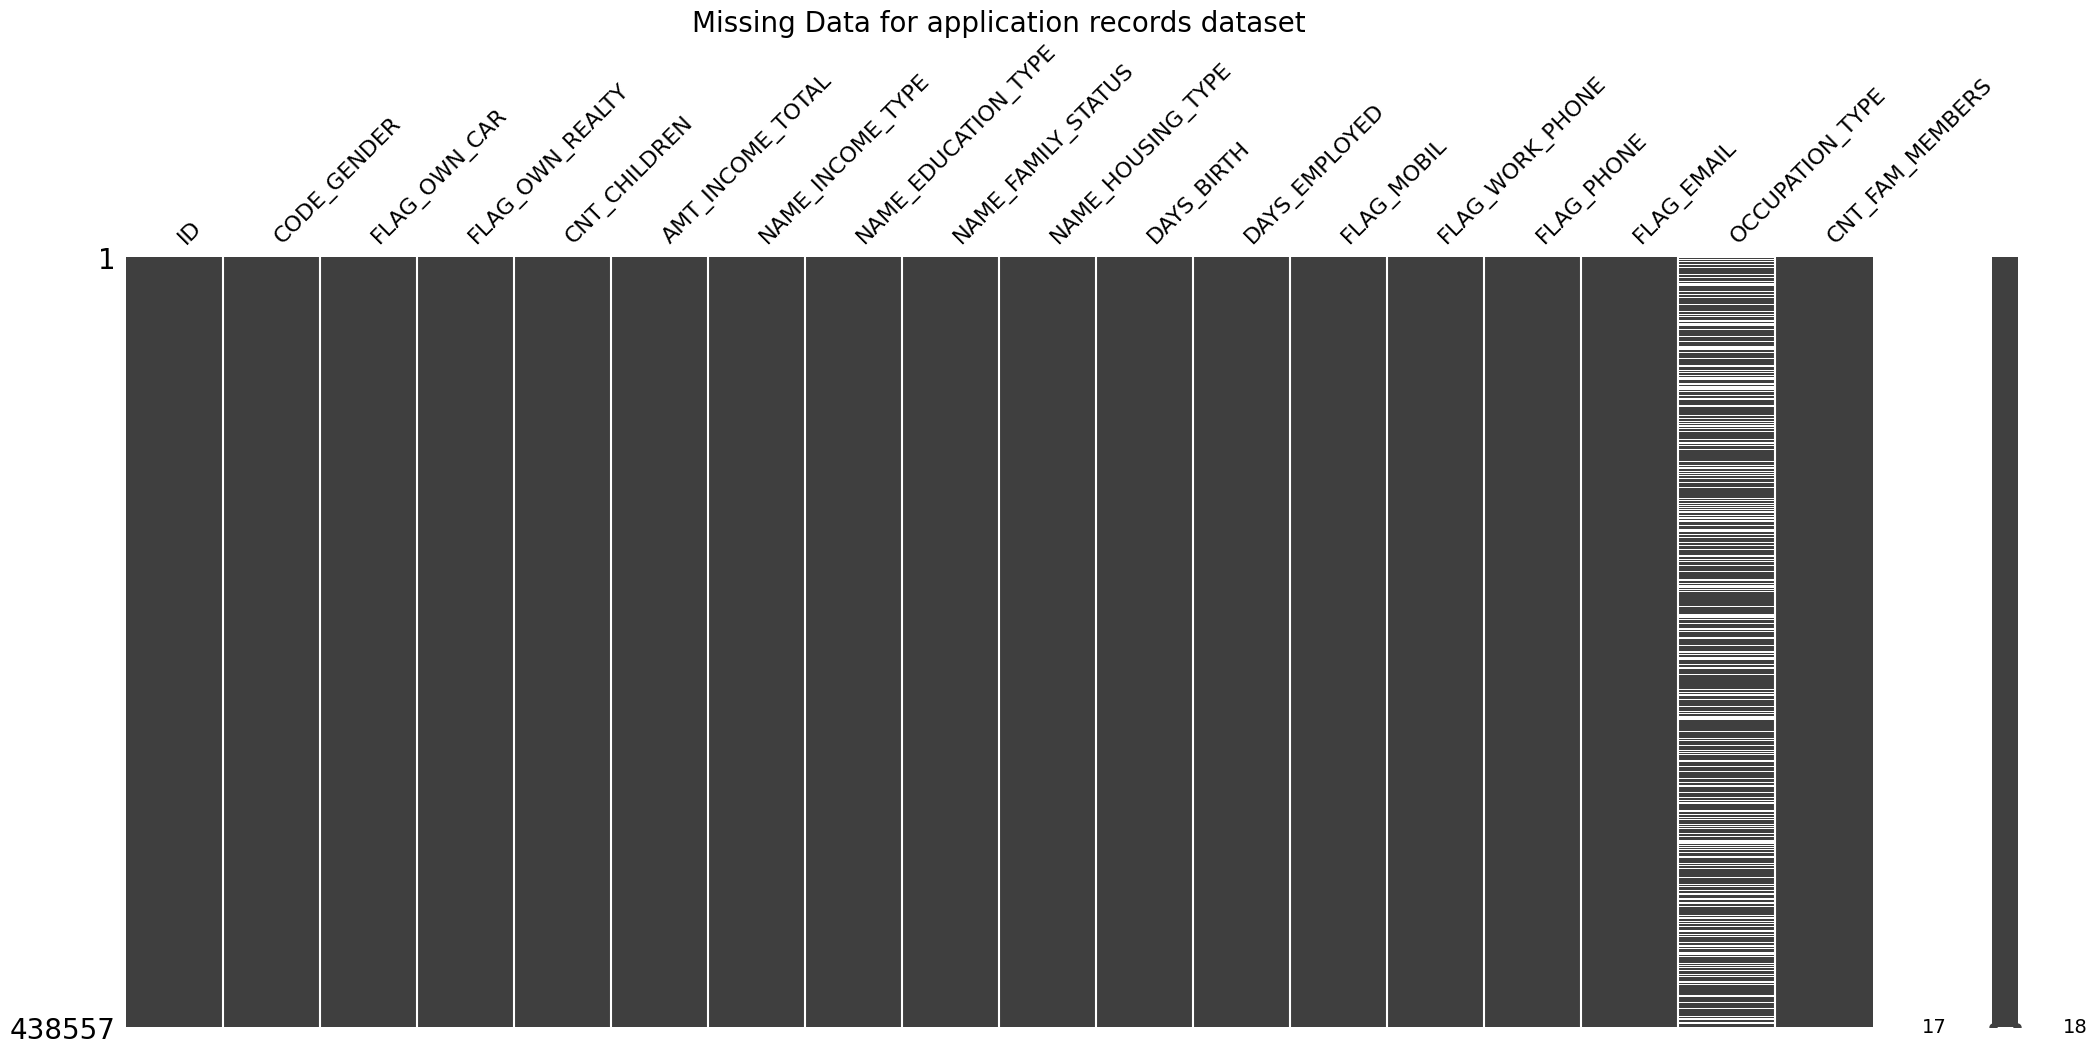

In [15]:
plt_missing_1 = msno.matrix(data)

plt_missing_1.set_title("Missing Data for application records dataset",fontsize=20)
plt.show()

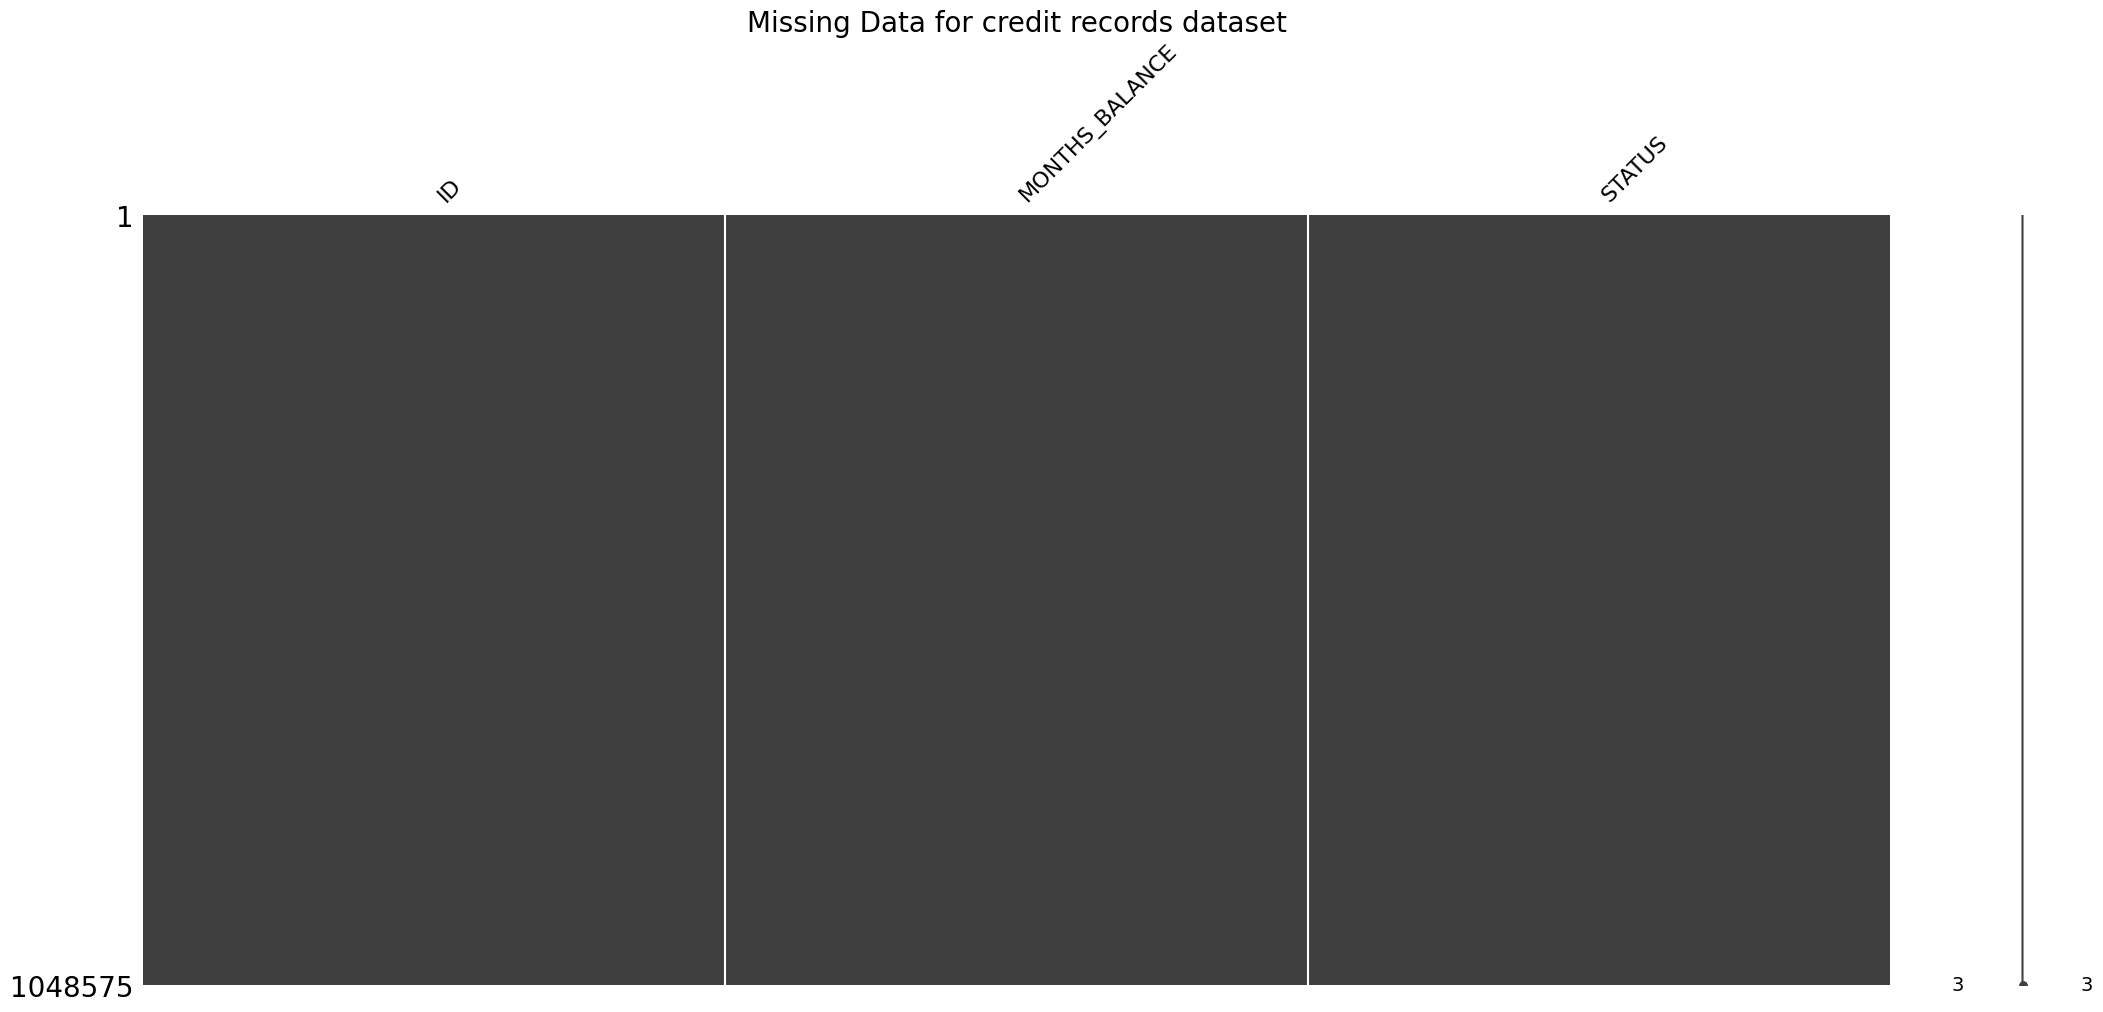

In [16]:
plt_missing_2 = msno.matrix(record)

plt_missing_2.set_title("Missing Data for credit records dataset",fontsize=20)
plt.show()

In [17]:
# check missing Value
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        134203
ID                          0
CODE_GENDER                 0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
CNT_FAM_MEMBERS             0
dtype: int64

In [18]:
# check missing Value
record.isnull().sum().sort_values(ascending=False)

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

We have checked the null values for records data, and all good here. Only 1 column contains null value that will be removed from our analysis

### Unique Counts

In [19]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
12           FLAG_MOBIL           1
1           CODE_GENDER           2
2          FLAG_OWN_CAR           2
3       FLAG_OWN_REALTY           2
15           FLAG_EMAIL           2
14           FLAG_PHONE           2
13      FLAG_WORK_PHONE           2
8    NAME_FAMILY_STATUS           5
6      NAME_INCOME_TYPE           5
7   NAME_EDUCATION_TYPE           5
9     NAME_HOUSING_TYPE           6
4          CNT_CHILDREN          12
17      CNT_FAM_MEMBERS          13
16      OCCUPATION_TYPE          18
5      AMT_INCOME_TOTAL         866
11        DAYS_EMPLOYED        9406
10           DAYS_BIRTH       16379
0                    ID      438510

In [20]:
unique_counts = pd.DataFrame.from_records([(col, record[col].nunique()) for col in record.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
2          STATUS           8
1  MONTHS_BALANCE          61
0              ID       45985

# 2 - Data Visualization

In [21]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,                                       
    "figure.autolayout":True})
                
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

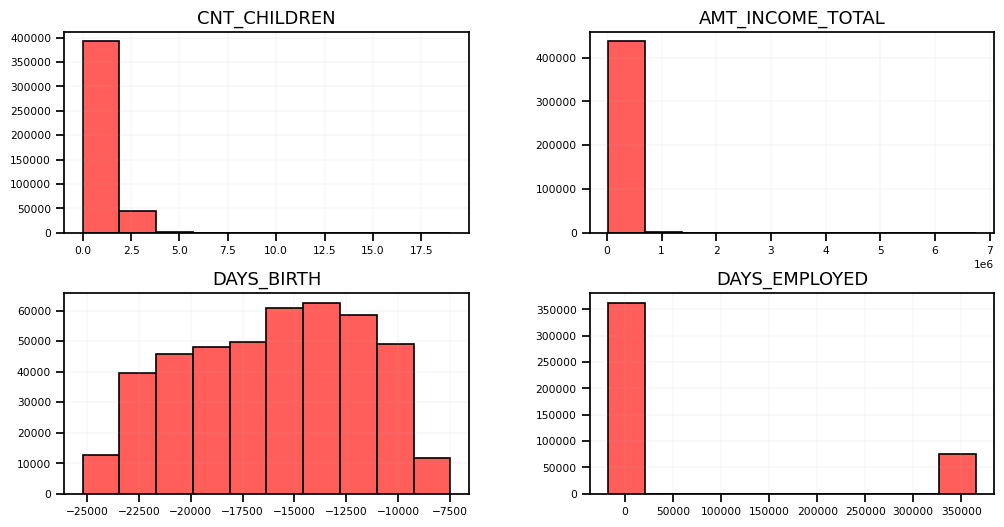

In [22]:
plt.figure(figsize=(10,10))

cols_to_plot = ["CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]
data[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

There are outliers in 2 columns.

<li>CNT_CHILDREN
<li>AMT_INCOME_TOTAL

In [23]:
data['DAYS_EMPLOYED'].value_counts()

 365243    75329
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

In [24]:
data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

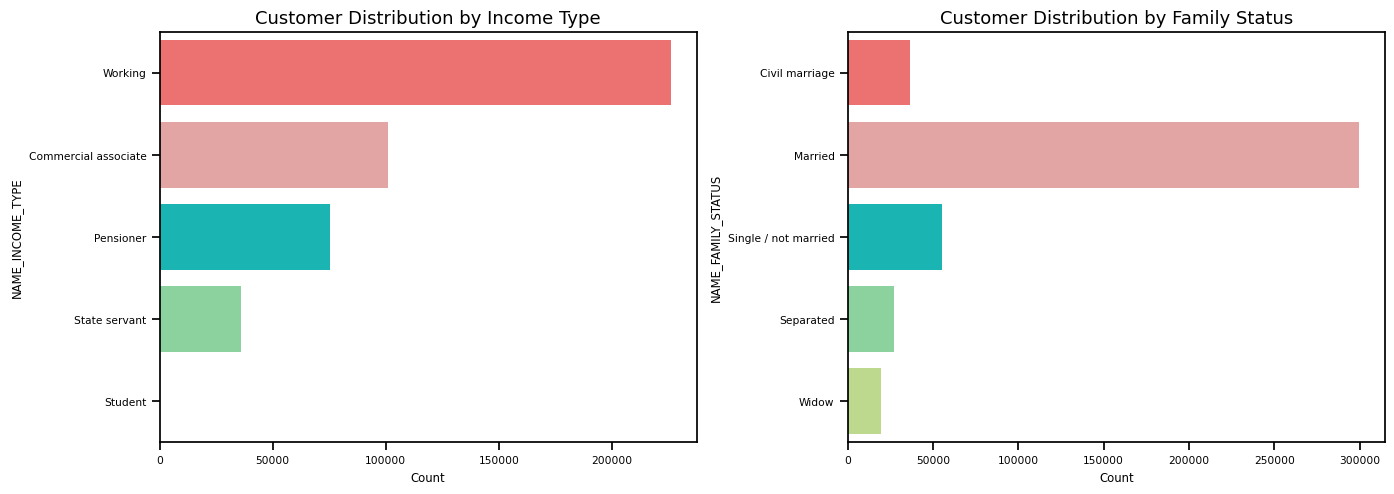

In [25]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=data.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=data.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

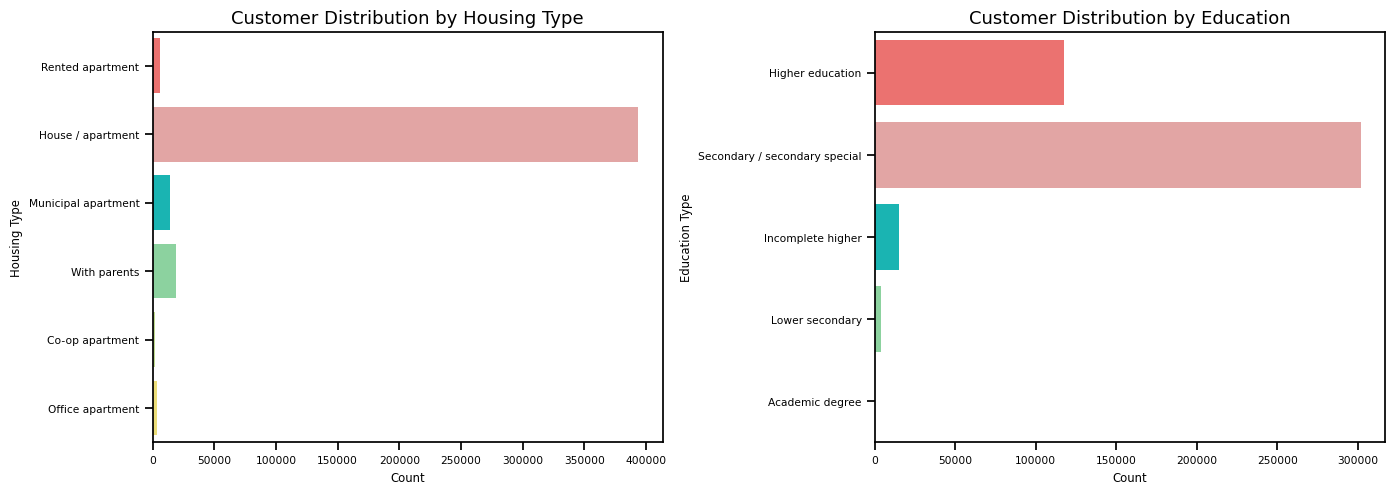

In [26]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=data.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=data.NAME_EDUCATION_TYPE, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

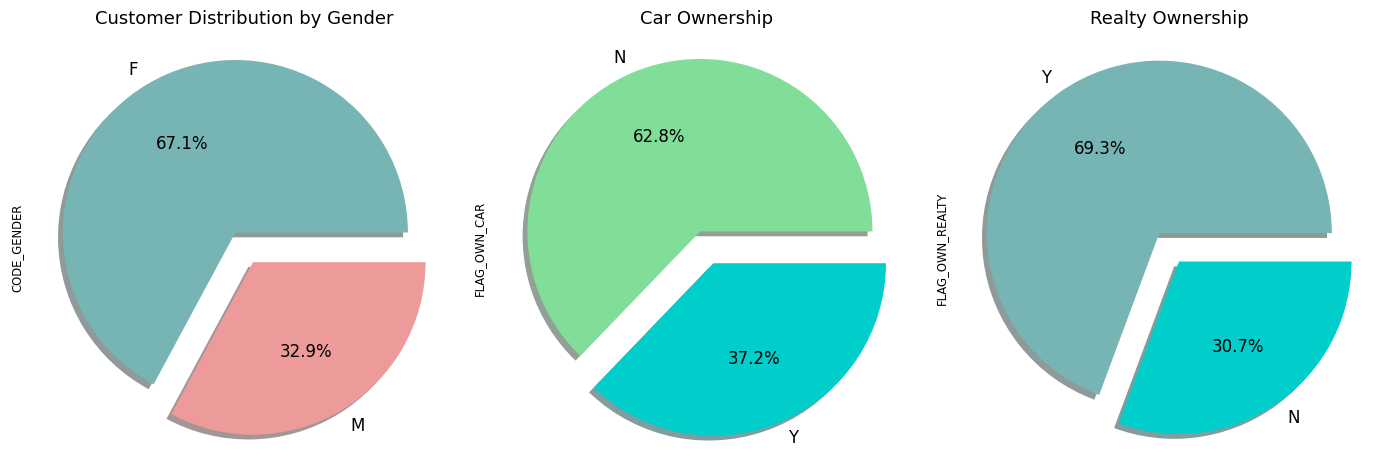

In [27]:
fig, axes = plt.subplots(1,3)

g1= data['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= data['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= data['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

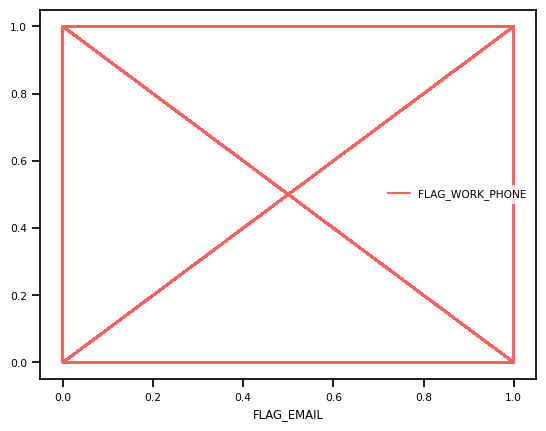

In [28]:
data.loc[data.NAME_INCOME_TYPE == 'Commercial associate'].plot(x='FLAG_EMAIL', y='FLAG_WORK_PHONE')
plt.show()

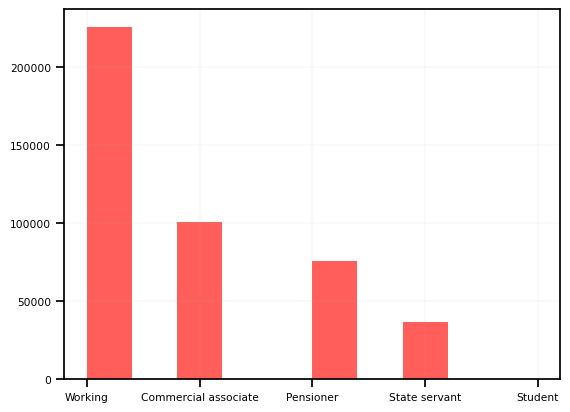

In [29]:
data['NAME_INCOME_TYPE'].hist()
plt.show()

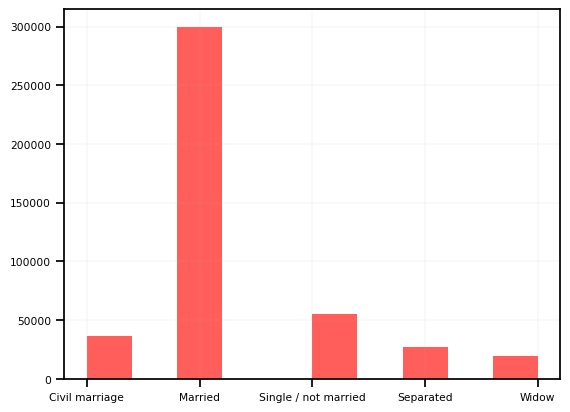

In [30]:
data['NAME_FAMILY_STATUS'].hist()
plt.show()

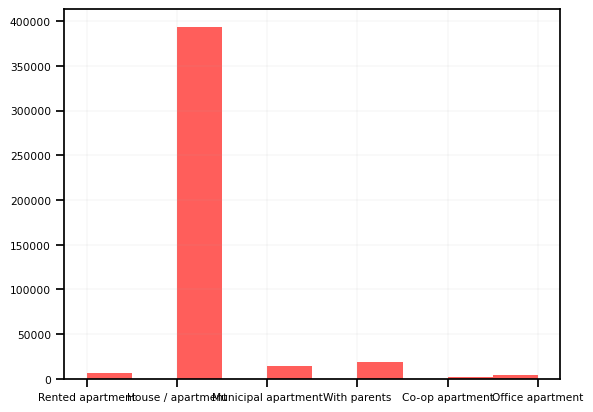

In [31]:
data['NAME_HOUSING_TYPE'].hist()
plt.show()

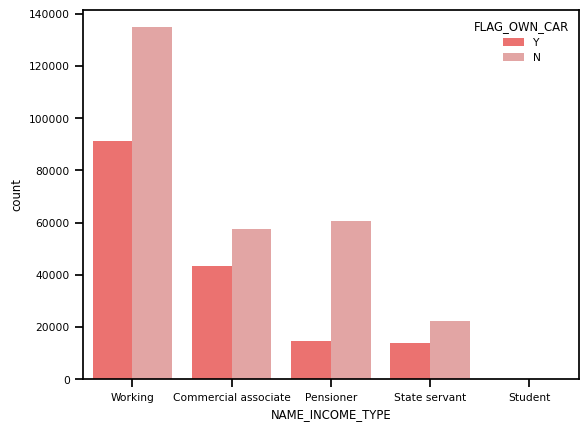

In [32]:
from pylab import rcParams
sns.countplot(x='NAME_INCOME_TYPE',hue='FLAG_OWN_CAR',data=data)
rcParams['figure.figsize'] = 25, 10
plt.show()

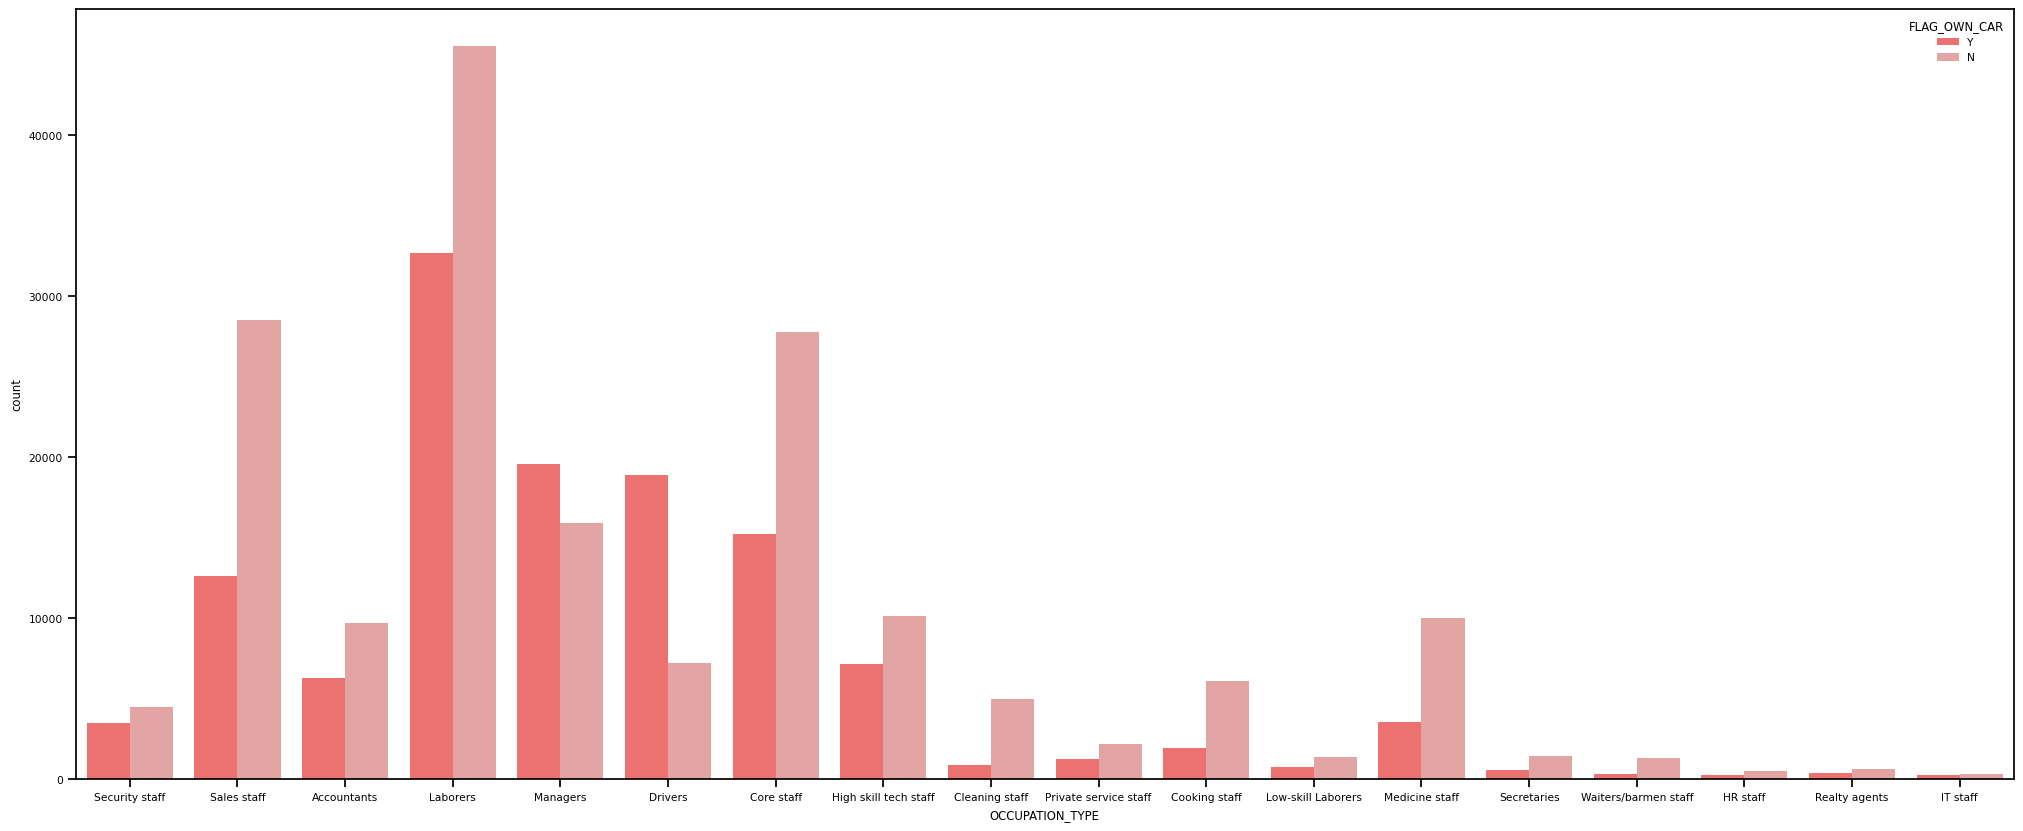

In [33]:
sns.countplot(x='OCCUPATION_TYPE',hue='FLAG_OWN_CAR',data=data)
plt.show()

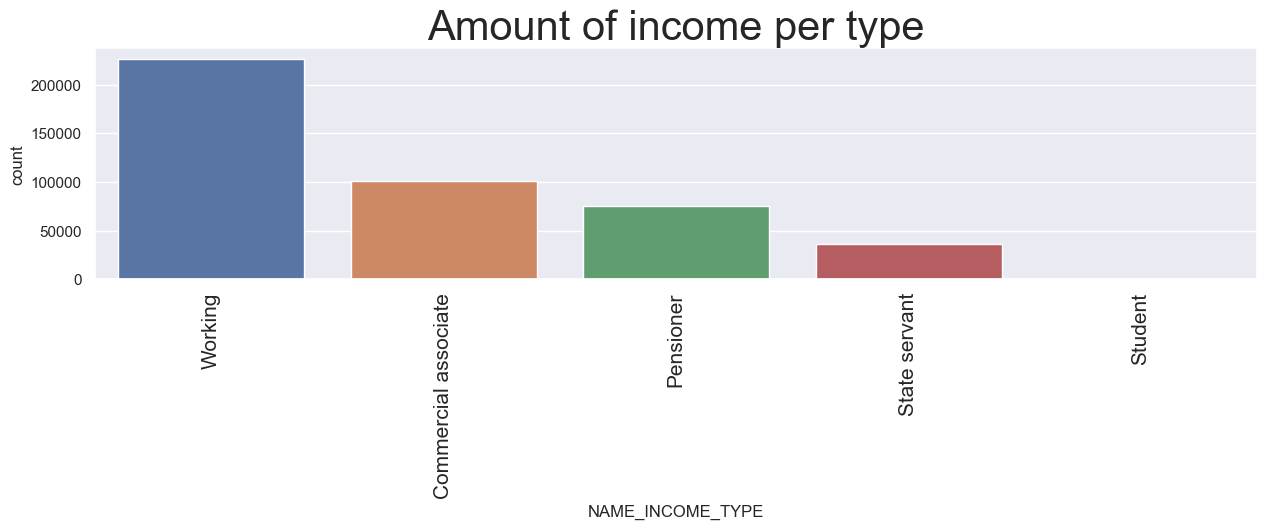

In [34]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(data['NAME_INCOME_TYPE'],hue_order=data.groupby('NAME_INCOME_TYPE'))
p.axes.set_title("Amount of income per type",fontsize=30)
plt.show()

(1.937, 69.849]       437186
(69.849, 137.088]       1240
(137.088, 204.327]        84
(204.327, 271.566]         7
(271.566, 338.805]        11
(338.805, 406.044]        12
(406.044, 473.283]        10
(473.283, 540.522]         0
(540.522, 607.761]         0
(607.761, 675.0]           7
Name: AMT_INCOME_TOTAL, dtype: int64


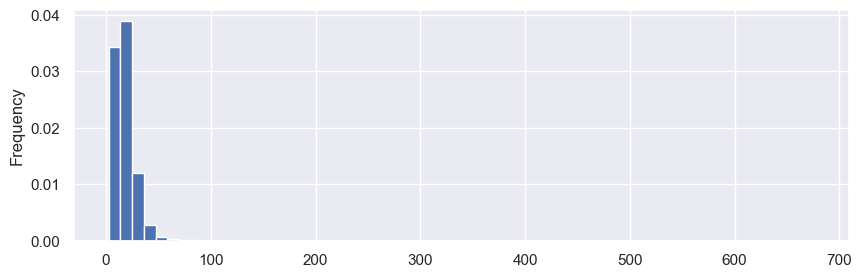

In [35]:
sns.set(rc={'figure.figsize':(10,3)})
df=pd.DataFrame(data['AMT_INCOME_TOTAL'].astype(object))
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL']/10000 
print(df['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
df['AMT_INCOME_TOTAL'].plot(kind='hist',bins=60,density=True)
plt.show()

In [36]:
pd.DataFrame(-(data['DAYS_BIRTH'])//365)

DAYS_BIRTH
0               32
1               32
2               58
3               52
4               52
...            ...
438552          62
438553          43
438554          22
438555          59
438556          51

[438557 rows x 1 columns]

(19.95, 24.9]    0.023436
(24.9, 29.8]     0.108816
(29.8, 34.7]     0.137553
(34.7, 39.6]     0.147235
(39.6, 44.5]     0.142346
(44.5, 49.4]     0.115303
(49.4, 54.3]     0.114286
(54.3, 59.2]     0.106636
(59.2, 64.1]     0.088463
(64.1, 69.0]     0.015925
Name: DAYS_BIRTH, dtype: float64


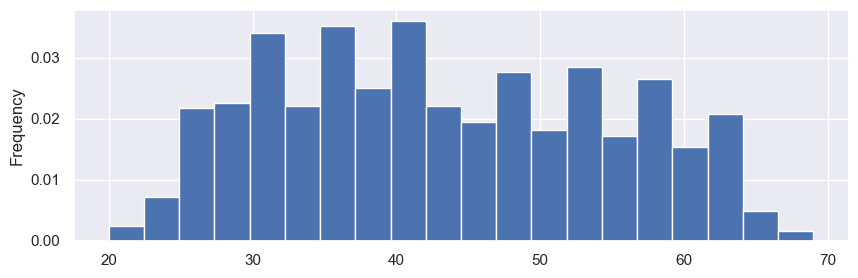

In [37]:
sns.set(rc={'figure.figsize':(10,3)})
df=pd.DataFrame(-(data['DAYS_BIRTH'])//365)
print(df['DAYS_BIRTH'].value_counts(bins=10,normalize=True,sort=False))
df['DAYS_BIRTH'].plot(kind='hist',bins=20,density=True)
plt.show()


In [40]:
data.to_csv("Data/Data Post EDA/data.csv", index=False)
record.to_csv("Data/Data Post EDA/record.csv", index=False)

## Automated EDA report creation

In [39]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly.express as px



In [40]:
app_record_profile = ProfileReport(data, title="Pandas Profiling Report")

In [ ]:
app_record_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
credit_record_profile = ProfileReport(record, title="Pandas Profiling Report")

In [ ]:
app_record_profile.to_notebook_iframe()